Перед началом выполнения, сделайте копию этого colab'а. Чтобы сделать копию нужно в пункте меню Файл выбрать "Сохранить копию на диске"

# Задание 1

---

Напишите программу, которая будет решать систему линейных уравнений вида:

\begin{matrix} a_{11}x+a_{12}y=b_{1}&(1) \\ a_{21}x+a_{22}y=b_{2} &(2) \end{matrix}
​
На вход программа должна принимать 2 строки.

Каждая строка содержит 3 действительных числа через пробел: коэффициенты a и b.

На выходе программа должна выдавать значения x и y в одну строку через пробел.


Примечание 1. Для разделения строки на отдельные элементы используйте функцию split()

Примечание 2. В качестве разделителя между целой и дробной частью используйте точку, например 0.2

2 4 9
2 4 12
no answers


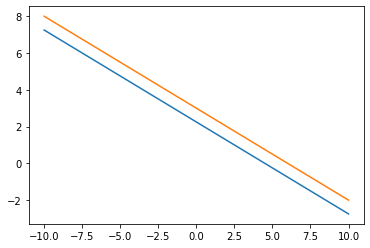

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def linan(matrix, vector):
  if matrix[0][0] * matrix[1][1] == matrix[0][1] * matrix[1][0] and matrix[0][0] * vector[1] == vector[0] * matrix[1][0]:
    return 'inf ans'
  if (np.linalg.det(matrix) == 0):
    return 'no answers'
  else:
    np.linalg.solve(matrix, vector)

# enter you code
str1 = input()
str2 = input()

a11, a12, b1 = str1.split(' ')
a21, a22, b2 = str2.split(' ')

matrix = np.array([[a11, a12], [a21, a22]], dtype=np.float64)
vector = np.array([b1, b2], dtype=np.float64)

ans = linan(matrix, vector)
print(ans)

l = -10
r = 10
x = np.linspace(l, r, 100000)

def func1(x, a1, a2, b):
  return (float(b) - float(a1) * x) / float(a2)

plt.plot(x, func1(x, a11, a12, b1))
plt.plot(x, func1(x, a21, a22, b2))
plt.show()



### Подсказка 1

# Задание 2

Напишите функцию `decorate_matrix`, которая получает на вход одно целое число больше единицы. Функция должна возвращать матрицу n на n, у которой на границах стоят единицы, а на всех остальных позициях(если остались позиции не на границах) стоят нули.

Нужно сделать без использования  циклов.

```
# ожидаемый резальтат для аргумента 5
array([[1., 1., 1., 1., 1.],
[1., 0., 0., 0., 1.],
[1., 0., 0., 0., 1.],
[1., 0., 0., 0., 1.],
[1., 1., 1., 1., 1.]])
```



In [ ]:
import numpy as np

def decorate_matrix(n):
  # create ones n-matrix
  matrix = np.ones((n, n))
  # make 1:n-1 in rows and cols elements = 0
  matrix[1: n-1, 1: n-1] = 0
  return matrix

n = int(input())
print(decorate_matrix(n))

5
[[1. 1. 1. 1. 1.]
 [1. 0. 0. 0. 1.]
 [1. 0. 0. 0. 1.]
 [1. 0. 0. 0. 1.]
 [1. 1. 1. 1. 1.]]


# Задание 3

1) реализуйте 2 функции:

$f(x) = (x+a)^2 - b$

$g(x) = |f(x)|$

2) Найдите аргументы, при которых достигается минимум функций $f(x)$ и $g(x)$

Пример.
Входные значение: $a=3$ и $b=4$

Выходные значения:

`-3.0 -1.0`

In [ ]:
import numpy as np
from scipy.optimize import golden

# func f(x)
def funcf(x, a, b):
  return (x + a) ** 2 - b

# func g(x)
def funcg(x, a, b):
  return abs(funcf(x, a, b))

# find min
# Fibonachi func
def FibonachiNumber(n):
    n = n + 1
    f = 1 / np.sqrt(5) * (((1 + np.sqrt(5)) / 2) ** n - ((1 - np.sqrt(5)) /2) ** n)
    return f
# Fibonachi method
def Fibonachi(l, r, a, b, func, epsilon = 0.000001):
    fn = 0 # func counting number
    ans = (l + r) / 2
    n = 1
    while (FibonachiNumber(n) <= (b - l) / epsilon):
        n = n + 1
    x1 = l + (r - l) * FibonachiNumber(n - 2) / FibonachiNumber(n)
    x2 = l + (r - l) * FibonachiNumber(n - 1) / FibonachiNumber(n)
    f1 = func(x1, a, b)
    f2 = func(x2, a, b)
    fn = fn + 2
    while(n > 2):
        if (f1 < f2):
            r = x2
            x2 = x1
            f2 = f1
            n=n-1
            x1 = l + (r - l) * FibonachiNumber(n - 2) / FibonachiNumber(n)
            f1 = func(x1, a, b)
        else:
            l = x1
            x1 = x2
            f1 = f2
            n=n-1
            x2 = l + (r - l) * FibonachiNumber(n - 1) / FibonachiNumber(n)
            f2 = func(x2, a, b)
        fn = fn + 1
        ans = (l + r) / 2
    return ans

a = int(input())
b = int(input())
l = -10
r = 10

min_xf = Fibonachi(l, r, a, b, funcf)
min_xg1 = Fibonachi(l, r, a, b, funcg)
min_xg2 = Fibonachi(min_xg1 + 1, r, a, b, funcg)

# check
one_min_g = False
min_xg = 0.0
if (abs(funcg(min_xg1, a, b) - funcg(min_xg2, a, b)) > 0.000001):
  one_min_g = True
  if funcg(min_xg1, a, b) > funcg(min_xg2, a, b):
    min_xg = min_xg2
  else:
    min_xg = min_xg1


# as it is symmetric
#min_xg1 = golden(lambda x:funcg(x, a, b), (l, r))
#min_xg2 = golden(lambda x:funcg(x, a, b), (min_xg1 + 1, r))
#min_xg1 = basinhopping(lambda x:funcg(x, a, b), l)

#print(f'{min_xf:.1f}', f'{min_xg:.1f}')
if (one_min_g):
  print(f'{min_xf:.1f}', f'{min_xg:.1f}')
else:
  print('[', f'{min_xf:.1f}', '] [', f'{min_xg1:.1f}', f'{min_xg2:.1f}', ']')

3
4
[ -3.0 ] [ -5.0 -1.0 ]


# Задание 4

Постройте графики для функций из предыдущего задания и отметьте другим цветом на графиках точки найденных минимумов.

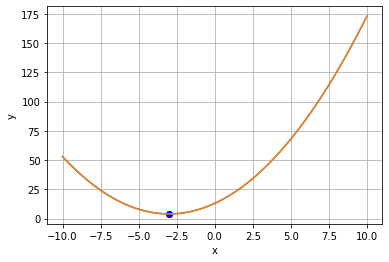

In [ ]:
import matplotlib.pyplot as plt

def show_plots(a, b, x, funcf, funcg, min_xf, min_xg1, min_xg2, one_min_g, min_xg):
  plt.plot(x, funcf(x, a, b))
  plt.plot(x, funcg(x, a, b))
  plt.grid()

  plt.scatter(min_xf, funcf(min_xf, a, b), c='r')
  if one_min_g:
    plt.scatter(min_xg, funcg(min_xg, a, b), c='b')
  else:
    plt.scatter(min_xg1, funcg(min_xg1, a, b), c='b')
    plt.scatter(min_xg2, funcg(min_xg2, a, b), c='g')

  plt.ylabel("y")
  plt.xlabel("x")
  plt.show()

l = -10
r = 10
x = np.linspace(l, r, 100000)
show_plots(a, b, x, funcf, funcg, min_xf, min_xg1, min_xg2, one_min_g, min_xg)


# Задание 5

1000 человек бросают монетку. Каждый бросил 10 раз подряд.

 1. Какова вероятность того, что хотя бы у одного человека монетка выпала 10 раз подряд той же самой стороной (орлом или решкой)?
 2. Какова вероятность того, что хотя бы у одного человека монетка выпала 8 раз подряд той же самой стороной (орлом или решкой)?
 3. Какова вероятность того, что ровно у троих человек из 1000 монетка выпала 10 раз подряд той же самой стороной (орлом или решкой)?

In [ ]:
from math import exp
import numpy as np

def count_dst(n=1, p=0.5, size=10):
  return np.random.binomial(1, 0.5, 10)

def amount_of_repeats1(t):
  return t == 10

def amount_of_repeats2(t):
  return t >= 8

def amount_of_people1(k):
  return k >= 1

def amount_of_people2(k):
  return k == 3

# repeats experiment with coin any 'times' need
# where are n people participate, count amount of coin side repeats by chosen func
# and amount of people func - how much of them are expected to get the result
def experiment(amount_of_repeats, amount_of_people, n, times):
  l = 0
  for i in range(times):
    k = 0
    for j in range(n):
      dst = count_dst()
      t = 1
      for x in range(10 - 1):
        if dst[x] == dst[x - 1]:
          t += 1
        else:
          t = 1
      if amount_of_repeats(t):
        k += 1
    if amount_of_people(k):
      l += 1
  return l / times

print(experiment(amount_of_repeats1, amount_of_people1, 1000, 1000))
print(experiment(amount_of_repeats2, amount_of_people1, 1000, 1000))
print(experiment(amount_of_repeats1, amount_of_people2, 1000, 1000))


0.859
1.0
0.184
